In [89]:
# End to end Classification model project (ML)

# Understand the Problem:
# Define the problem and the goal of classification.
# Determine the target variable and its classes/categories.
# Data Collection:
# Gather relevant data for the classification task.
# Data Preprocessing:
# Handle missing values (impute or remove).
# Exploratory Data Analysis (EDA):
# Split the data into training and testing : 
# Model Selection:
# Choose appropriate classification algorithms.
# Model Training:
# Train models using the training dataset.
# Model Evaluation:
# Evaluate model

# for increasing model performance
# Feature engineering 
# hyper parameter tuning
# regularization techniques

# For unbanned dataset
# Over sampling 
# Under sampling

In [90]:
### Problem Statement


'''A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.
Help Build Predictive Models And Save The Company's Money.
Perform Fascinating EDAs.'''


"A Tour & Travels Company Wants To Predict Whether A Customer Will Churn Or Not Based On Indicators Given Below.\nHelp Build Predictive Models And Save The Company's Money.\nPerform Fascinating EDAs."

In [ ]:
# Age
# Age of user

# FrequentFlyer
# Whether Customer takes frequent flights

# AnnualIncomeClass
# Class of annual income of user

# ServicesOpted
# Number of times services opted during recent years

# AccountSyncedToSocialMedia
# Whether Company Account Of User Synchronised to Their Social Media

# BookedHotelOrNot
# Whether the customer book lodgings/Hotels using company services

# Target
# 1- Customer Churns 0- Customer Doesnt Churn

In [3]:
# 1 import necessary libraries
from sklearn import *
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### 2 Load Data Sets
df = pd.read_csv("Customertravel.csv")
print(df.head(10))
# print(len(original_data))

   Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0   34            No     Middle Income              6   
1   34           Yes        Low Income              5   
2   37            No     Middle Income              3   
3   30            No     Middle Income              2   
4   30            No        Low Income              1   
5   27           Yes       High Income              1   
6   34            No     Middle Income              4   
7   34            No        Low Income              2   
8   30            No        Low Income              3   
9   36           Yes       High Income              1   

  AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                         No              Yes       0  
1                        Yes               No       1  
2                        Yes               No       0  
3                         No               No       0  
4                         No               No       0  
5                         No        

In [5]:
### 3 Null Values
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [6]:
 #### Exploratory Data Analysis (EDA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [7]:
df.shape

(954, 7)

In [8]:
df.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

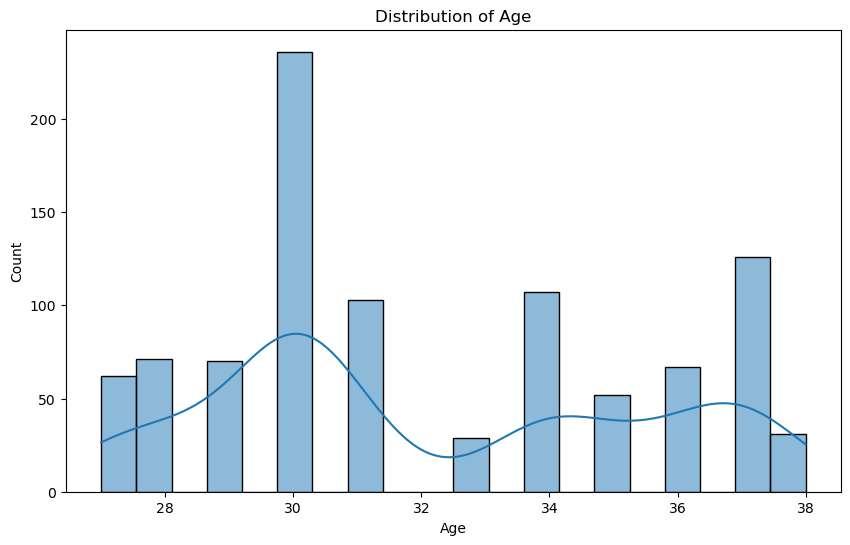

In [9]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

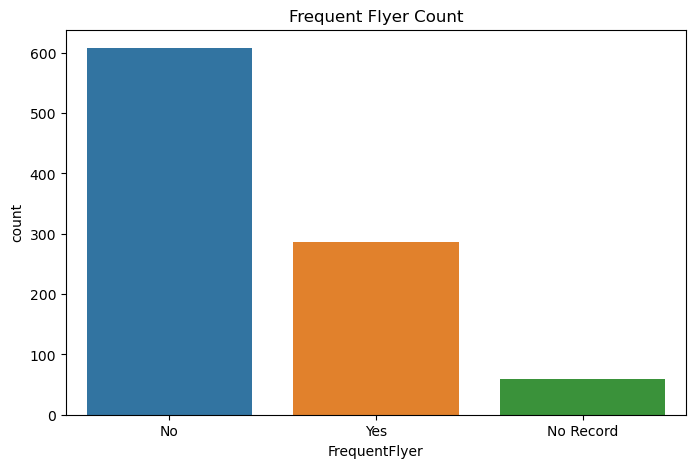

In [10]:
# Countplot for 'FrequentFlyer'
plt.figure(figsize=(8, 5))
sns.countplot(x='FrequentFlyer', data=df)
plt.title('Frequent Flyer Count')
plt.show()


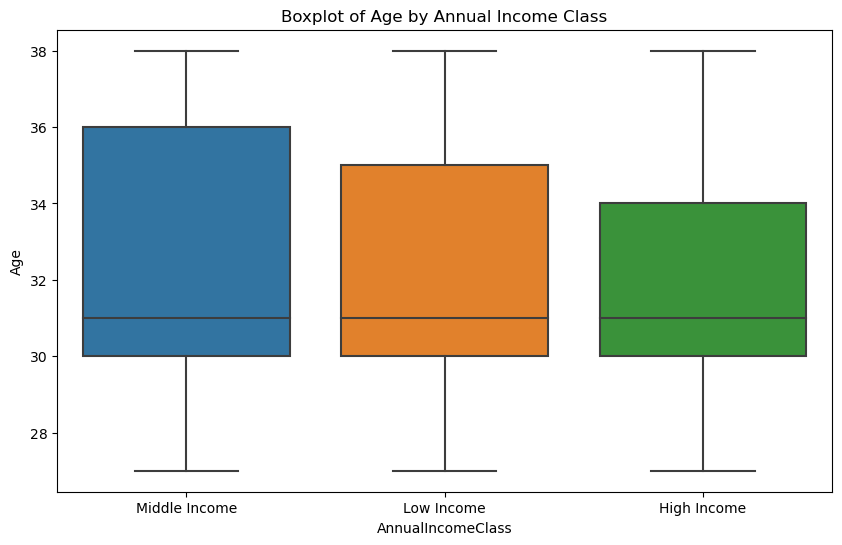

In [11]:

# Boxplot for 'AnnualIncomeClass'
plt.figure(figsize=(10, 6))
sns.boxplot(x='AnnualIncomeClass', y='Age', data=df)
plt.title('Boxplot of Age by Annual Income Class')
plt.show()



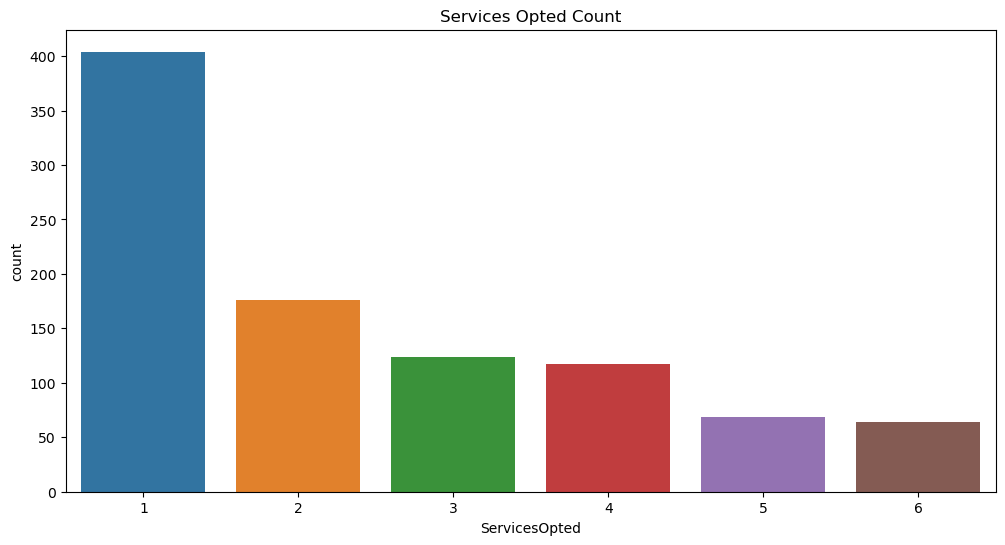

In [12]:
# Countplot for 'ServicesOpted'
plt.figure(figsize=(12, 6))
sns.countplot(x='ServicesOpted', data=df)
plt.title('Services Opted Count')
plt.show()



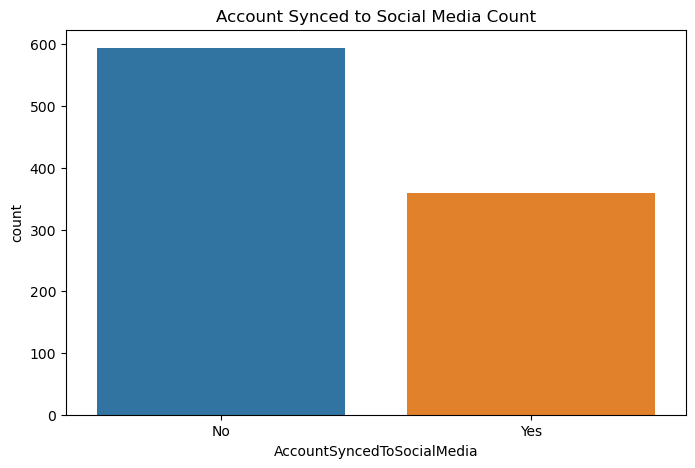

In [13]:
# Countplot for 'AccountSyncedToSocialMedia'
plt.figure(figsize=(8, 5))
sns.countplot(x='AccountSyncedToSocialMedia', data=df)
plt.title('Account Synced to Social Media Count')
plt.show()


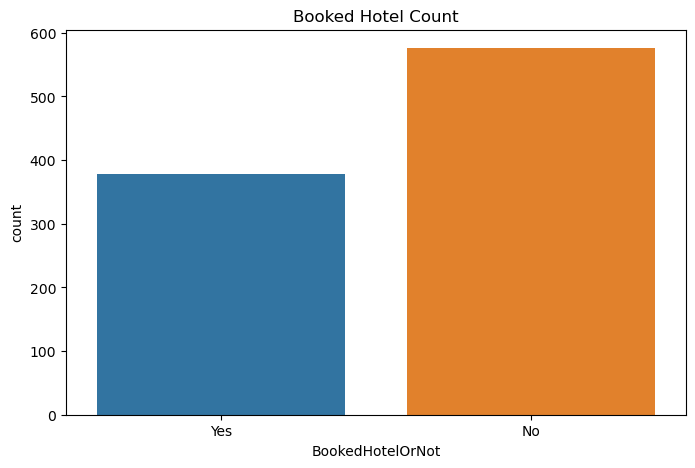

In [14]:

# Countplot for 'BookedHotelOrNot' (Target variable)
plt.figure(figsize=(8, 5))
sns.countplot(x='BookedHotelOrNot', data=df)
plt.title('Booked Hotel Count')
plt.show()


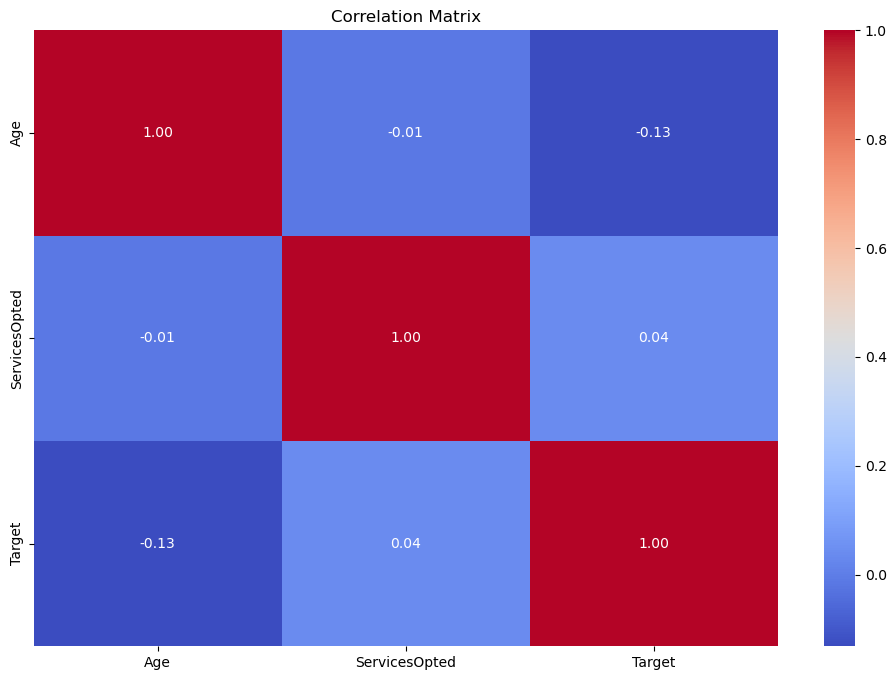

In [15]:

# Correlation heatmap for numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [17]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


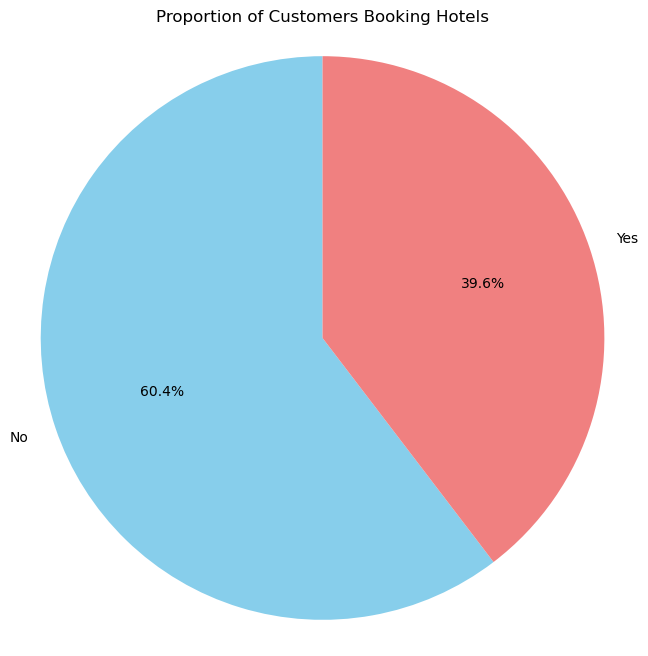

In [18]:
# Count the number of customers who booked hotels and those who didn't
hotel_counts = df['BookedHotelOrNot'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Customers Booking Hotels')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the plot
plt.show()

In [88]:
# Step 1: Understanding the Pie Chart
# The pie chart visually represents the distribution of hotel bookings among the customers in your dataset.

# Step 2: Identifying Slices
# In a pie chart, each slice represents a category or a part of the whole. In this case, there are two slices:

# Blue Slice (60%): Represents customers who did not book hotels ("No").
# Red Slice (40%): Represents customers who booked hotels ("Yes").
# Step 3: Percentage Distribution
# The percentages associated with each slice indicate the proportion of the whole dataset that falls into each category.

# Blue Slice (60%): 60% of the customers in the dataset did not book hotels.
# Red Slice (40%): 40% of the customers in the dataset booked hotels.
# Step 4: Interpretation
# dtaPutting it all together:

# The majority of customers (60%) in the dataset did not book hotels, as represented by the larger blue slice.
# A significant portion (40%) of customers in the dataset did book hotels, as represented by the red slice.
# Step 5: Conclusions
# Based on this interpretation, you can draw conclusions about the distribution of hotel bookings among the customers. For example, you can say that a substantial portion of the customers have engaged in hotel bookings, while the majority have not.




# 2 Label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [35]:
target_variable = 'BookedHotelOrNot'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
df[target_variable] = label_encoder.fit_transform(df[target_variable])

In [37]:
target_variable = 'AccountSyncedToSocialMedia'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
df[target_variable] = label_encoder.fit_transform(df[target_variable])

In [ ]:
target_variable = 'FrequentFlyer'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
df[target_variable] = label_encoder.fit_transform(df[target_variable])

In [41]:
df_chr=df.select_dtypes(include='object')

In [42]:
df_chr

,FrequentFlyer,AnnualIncomeClass
0,No,Middle Income
1,Yes,Low Income
2,No,Middle Income
3,No,Middle Income
4,No,Low Income
...,...,...
949,Yes,Low Income
950,No,Middle Income
951,No,Middle Income
952,No,Low Income


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
label_encoder=LabelEncoder()

In [45]:
for column in df_chr.columns:
    df[column]=label_encoder.fit_transform(df[column])

In [46]:
df

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0
...,...,...,...,...,...,...,...
949,31,2,1,1,0,0,0
950,30,0,2,5,0,1,0
951,37,0,2,4,0,0,0
952,30,0,1,1,1,1,0


# 3. Checking Dataset

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [58]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia'], drop_first=True)


In [59]:
# Assuming 'BookedHotelOrNot' is the target variable
X = df_encoded.drop(['BookedHotelOrNot', 'Target'], axis=1)  # Features
y = df_encoded['BookedHotelOrNot']  # Target variable


In [64]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
# Step 8: Model Selection: Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Step 9: Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred = model.predict(X_test)


In [67]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [68]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.65

Confusion Matrix:
 [[82 26]
 [40 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       108
           1       0.62      0.52      0.57        83

    accuracy                           0.65       191
   macro avg       0.65      0.64      0.64       191
weighted avg       0.65      0.65      0.65       191



# XGBOOST 

In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [71]:
# Assuming 'BookedHotelOrNot' is the target variable
X = df.drop(['BookedHotelOrNot', 'Target'], axis=1)  # Features
y = df['BookedHotelOrNot']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = XGBClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.63

Confusion Matrix:
 [[78 30]
 [40 43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       108
           1       0.59      0.52      0.55        83

    accuracy                           0.63       191
   macro avg       0.63      0.62      0.62       191
weighted avg       0.63      0.63      0.63       191



# KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

In [76]:
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.65
Confusion Matrix:
 [[82 26]
 [41 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71       108
           1       0.62      0.51      0.56        83

    accuracy                           0.65       191
   macro avg       0.64      0.63      0.63       191
weighted avg       0.65      0.65      0.64       191



# SVC

In [77]:
from sklearn.svm import SVC
model=SVC(random_state=42)

In [78]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.57
Confusion Matrix:
 [[108   0]
 [ 83   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       108
           1       0.00      0.00      0.00        83

    accuracy                           0.57       191
   macro avg       0.28      0.50      0.36       191
weighted avg       0.32      0.57      0.41       191



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier:
Builds a tree-like structure to make decisions based on features.
Can handle both numerical and categorical data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)


In [79]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.57
Confusion Matrix:
 [[108   0]
 [ 83   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72       108
           1       0.00      0.00      0.00        83

    accuracy                           0.57       191
   macro avg       0.28      0.50      0.36       191
weighted avg       0.32      0.57      0.41       191



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Classifier:
Builds a series of weak learners (usually decision trees) and combines their predictions.
Effective for both regression and classification tasks.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)


In [81]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.68
Confusion Matrix:
 [[93 15]
 [46 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       108
           1       0.71      0.45      0.55        83

    accuracy                           0.68       191
   macro avg       0.69      0.65      0.65       191
weighted avg       0.69      0.68      0.66       191



# AdaBoost Classifier:
Boosting algorithm that combines multiple weak classifiers to create a strong classifier.
Focuses on misclassified data points in each iteration.

In [82]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)


In [83]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.74
Confusion Matrix:
 [[91 17]
 [32 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       108
           1       0.75      0.61      0.68        83

    accuracy                           0.74       191
   macro avg       0.74      0.73      0.73       191
weighted avg       0.74      0.74      0.74       191



# Naive Bayes Classifier:

Based on Bayes' theorem and assumes independence between features.
Simple and fast, often used for text classification.

In [84]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [85]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.62
Confusion Matrix:
 [[77 31]
 [41 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       108
           1       0.58      0.51      0.54        83

    accuracy                           0.62       191
   macro avg       0.61      0.61      0.61       191
weighted avg       0.62      0.62      0.62       191



# Neural Network (MLPClassifier):

Multi-layer Perceptron (MLP) classifier, a type of artificial neural network.
Powerful for complex tasks but may require more computational resources.

In [86]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42)


In [87]:
 # Train the model on the training data
model.fit(X_train, y_train)
    # Make predictions on the testing data
y_pred = model.predict(X_test)
    # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.70
Confusion Matrix:
 [[95 13]
 [44 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77       108
           1       0.75      0.47      0.58        83

    accuracy                           0.70       191
   macro avg       0.72      0.67      0.67       191
weighted avg       0.71      0.70      0.69       191



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
